In [34]:
# encoding=utf8 


In [184]:

import pandas as pd

data = pd.read_csv("data-verici.csv", encoding = 'utf8', decimal=",")
df1 = pd.Categorical(data[u'Nejvyšší dosažené vzdělání:'])
data['vzdelani'] = df1.codes
df2 = pd.Categorical(data[u'Pohlaví:'])
data['pohlavi'] = df2.codes
df2 = pd.Categorical(data[u'vira'], categories=["Ne", "Ano"])
data['vira_c'] = df2.codes
data.head()

,Časová značka,Pohlaví:,Věk:,Nejvyšší dosažené vzdělání:,Jste věřící?,V co věříte?,Unnamed: 6,Unnamed: 7,vira,"Pokud se hlásíte k některé církvi, uveďte prosím k jaké:",...,COS,EPD,EWB,PAR,REL,CELKEM,Unnamed: 121,vzdelani,pohlavi,vira_c
0,26.2.2018 13:26:35,Žena,19,ZŠ,Ano,"Nejsem věřící tak, že chodím do kostela, ale v...",něco mezi nebem a Zemí,A,Ano,NaN,...,13,14,15,21,10,73,NaN,4,1,1
1,24.2.2018 20:06:33,Žena,20,ZŠ,Ano,v učení katolické církve,v Boha,B,Ano,římskokatolická církev,...,20,21,14,7,23,85,NaN,4,1,1
2,22.2.2018 13:29:33,Žena,20,SŠ,Ano,V Boha,v Boha,B,Ano,Katolická,...,15,14,6,8,15,58,NaN,0,1,1
3,26.2.2018 12:52:27,Muž,21,VŠ - bakalářské,Ano,Boha,v Boha,B,Ano,Krestanstvo,...,18,5,19,6,12,60,robert.kolcun@gmail.com,2,0,1
4,26.2.2018 15:44:38,Žena,21,SŠ,Ano,v Boha,v Boha,B,Ano,Církev Adventistů sedmého dne,...,20,9,19,14,20,82,NaN,0,1,1


In [36]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [346]:
import numpy as np

def histogram(field):
    local_data = data[field].astype(float)
    loc, scale = stats.norm.fit(local_data)
    n = stats.norm(loc=loc, scale=scale)

    plt.hist(local_data, bins=30, rwidth=0.5)
    plt.show()
    
    results = {}
    shapiro = stats.shapiro(local_data)
    print("Shapiro:\n  W: %f\n  p-value: %f\n" % (shapiro[0], shapiro[1]))
    results['Shapiro'] = shapiro[0]

    ks_results = stats.kstest(local_data, n.cdf)
    print("Kolmogorov:\n  Statistics: %f\n  p-value: %f" % (ks_results[0], ks_results[1]))
    results['Kolmogorov'] = ks_results[0]

In [601]:
def pearson_sperman_lin_plot(a_name, b_name):
    a = data[a_name]
    b = data[b_name]
    plt.scatter(x=a, y=b)

    pearson = stats.pearsonr(a, b)
    print("Pearson:\n  PCC: %f\n  p-value: %f\n" % pearson)

    spearman = stats.spearmanr(a, b)
    print("Spearman:\n  Corr: %s\n  pvalue: %f\n" % spearman)

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(a, b)
    print("Slope: %f\n  Intercept: %f\n  rvalue: %f\n  pvalue: %f\n  stderr: %f\n" % (slope, intercept, rvalue, pvalue, stderr))

    lin_y = [slope * x + intercept for x in a]
    plt.plot(a, lin_y, color='red')
    plt.show()
    

In [618]:
def compute_z(u, xa, ya):
    m_u = len(xa)*len(ya)/2
    sigma_u = np.sqrt(len(xa)*len(ya)*(len(xa)+len(ya)+1)/12)
    z = (u - m_u)/sigma_u
    return z

def mw_ttest_lin_relig(what):
    x = df1['vira_c']
    y = df1[what]

    plt.scatter(x=x, y=y)

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

    ano = df1[df1[u'vira'] == u'Ano']
    ne = df1[df1[u'vira'] == u'Ne']

    mw = stats.mannwhitneyu(ano[what], ne[what])
    xa = ano[what]
    ya = ne[what]
    z = compute_z(mw[0], xa, ya)
    
    print("Mann-Whitney:\n  Stat: %f\n  pvalue: %f\n  z: %f\n" % (mw[0], mw[1], z))

    ttest = stats.ttest_ind(ano[what], ne[what])
    print("t-test:\n  Stat: %f\n  pvalue: %f \n" % ttest)
    # Krizická hodnota t = 2.357 - hypotéza se zamítá

    y = [slope * x_val + intercept for x_val in pohlavi]
    plt.plot(pohlavi, y, color='red')
    plt.xticks([0, 1], [u'Ne', u'Ano'])
    plt.show()



In [619]:
def mw_ttest_lin_sex(what):
    pohlavi = df1['pohlavi']
    y = df1[what]

    plt.scatter(x=pohlavi, y=y)

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(pohlavi, y)

    muzi = df1[df1[u'Pohlaví:'] == u'Muž']
    zeny = df1[df1[u'Pohlaví:'] == u'Žena']

    mw = stats.mannwhitneyu(muzi[what], zeny[what])
    print("Mann-Whitney:\n  Stat: %f\n  pvalue: %f\n  z: %f\n" % (mw[0], mw[1], compute_z(mw[0], muzi[what], zeny[what])))

    ttest = stats.ttest_ind(muzi[what], zeny[what])
    print("t-test:\n  Stat: %f\n  pvalue: %f \n" % ttest)
    # Krizická hodnota t = 2.357 - hypotéza se zamítá

    y = [slope * x + intercept for x in pohlavi]
    plt.plot(pohlavi, y, color='red')
    plt.xticks([0, 1], [u'Muž', u'Žena'])
    plt.show()


# SCS

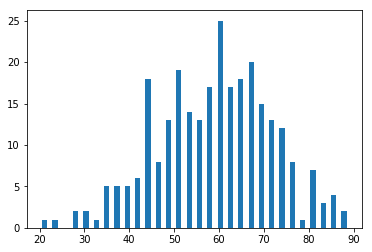

Shapiro:
  W: 0.994261
  p-value: 0.385880

Kolmogorov:
  Statistics: 0.062420
  p-value: 0.225017


In [621]:
histogram(u'součet')

# DAP-R

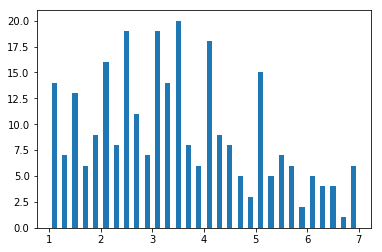

Shapiro:
  W: 0.968727
  p-value: 0.000011

Kolmogorov:
  Statistics: 0.080983
  p-value: 0.051287


In [622]:
histogram('FD')

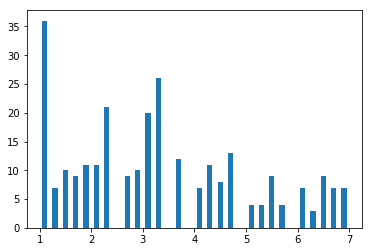

Shapiro:
  W: 0.934064
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.097198
  p-value: 0.010310


In [623]:
histogram('DA')

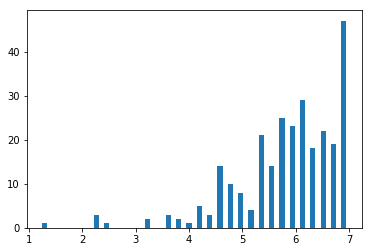

Shapiro:
  W: 0.882128
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.135880
  p-value: 0.000069


In [624]:
histogram('NA')

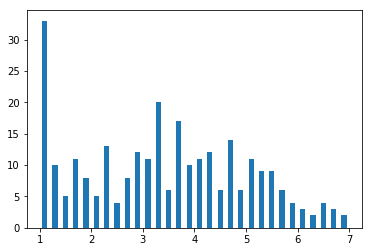

Shapiro:
  W: 0.962642
  p-value: 0.000002

Kolmogorov:
  Statistics: 0.070387
  p-value: 0.124994


In [625]:
histogram('AA')

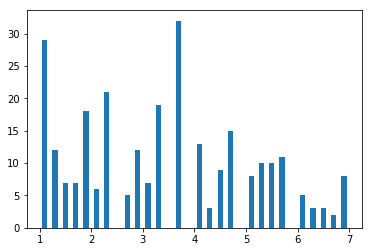

Shapiro:
  W: 0.952294
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.089420
  p-value: 0.023083


In [626]:
histogram('EA')

# ESI

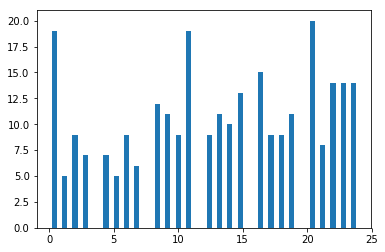

Shapiro:
  W: 0.947277
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.090085
  p-value: 0.021603


In [627]:
histogram('COS')

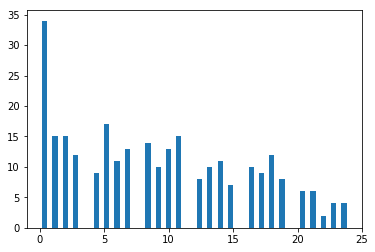

Shapiro:
  W: 0.941738
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.096354
  p-value: 0.011288


In [628]:
histogram('EPD')

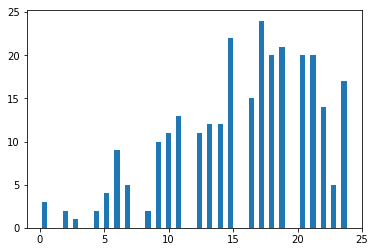

Shapiro:
  W: 0.959090
  p-value: 0.000001

Kolmogorov:
  Statistics: 0.105308
  p-value: 0.004141


In [629]:
histogram('EWB')

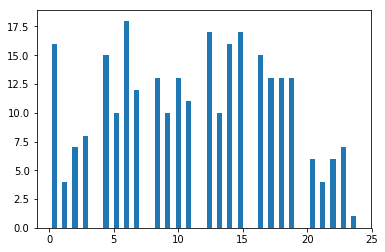

Shapiro:
  W: 0.970139
  p-value: 0.000017

Kolmogorov:
  Statistics: 0.078583
  p-value: 0.063442


In [630]:
histogram('PAR')

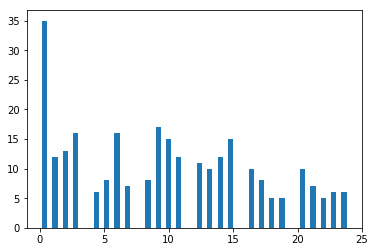

Shapiro:
  W: 0.944238
  p-value: 0.000000

Kolmogorov:
  Statistics: 0.104478
  p-value: 0.004561


In [631]:
histogram('REL')

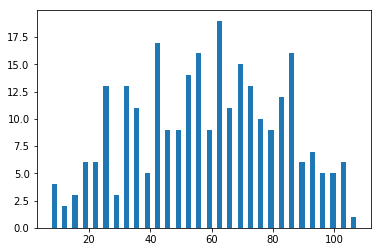

Shapiro:
  W: 0.982637
  p-value: 0.002003

Kolmogorov:
  Statistics: 0.050076
  p-value: 0.487207


In [632]:
histogram('CELKEM')

# Histogram CELKEM

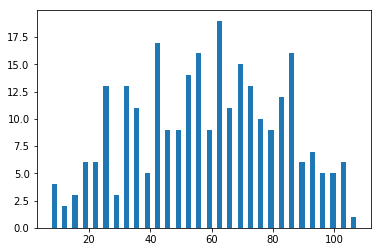

Shapiro:
  W: 0.982637
  p-value: 0.002003

Kolmogorov:
  Statistics: 0.050076
  p-value: 0.487207


In [633]:
histogram('CELKEM')


# Histogram Součet

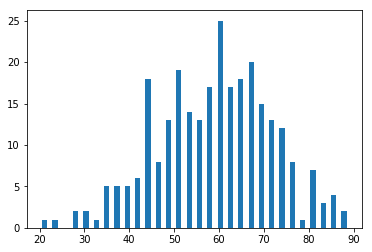

Shapiro:
  W: 0.994261
  p-value: 0.385880

Kolmogorov:
  Statistics: 0.062420
  p-value: 0.225017


In [634]:
histogram(u'součet')

In [635]:
c = [str(x) for x in data[u'součet']]
with open("soucet.csv", "w") as fp:
    fp.write("\n".join(c))
#data['součet'].to_csv('soucet.csv')

# SCS correlations

Pearson:
  PCC: 0.135153
  p-value: 0.025004

Spearman:
  Corr: 0.1455046389081874
  pvalue: 0.015744

Slope: 0.208680
  Intercept: 52.793838
  rvalue: 0.135153
  pvalue: 0.025004
  stderr: 0.092592



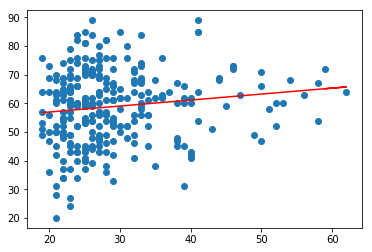

In [636]:
#Věk vs. Součet
pearson_sperman_lin_plot(u'Věk:', u'součet')

Mann-Whitney:
  Stat: 6990.500000
  pvalue: 0.009133
  z: -2.360012

t-test:
  Stat: 2.609385
  pvalue: 0.009571 



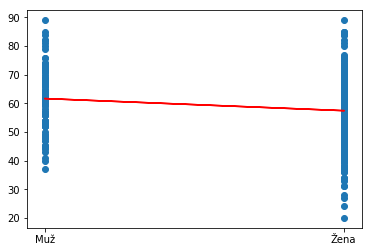

In [637]:
#Pohlaví vs. Součet

mw_ttest_lin_sex(u'součet')

Mann-Whitney:
  Stat: 8190.500000
  pvalue: 0.037119
  z: -1.785168

t-test:
  Stat: 1.644792
  pvalue: 0.101164 



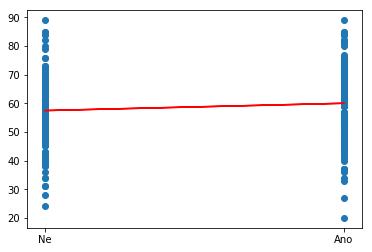

In [638]:
#Víra vs. Součet

mw_ttest_lin_relig(u'součet')

Nejvyšší dosažené vzdělání:
SŠ                          36
VOŠ                          5
VŠ - bakalářské             45
VŠ - magisterské a vyšší    99
ZŠ                           3
dtype: int64

ANOVA
Statistics: 0.306781
pvalue: 0.873187

pvalue > 0.05 - přijímáme hypotézu - nemá vliv


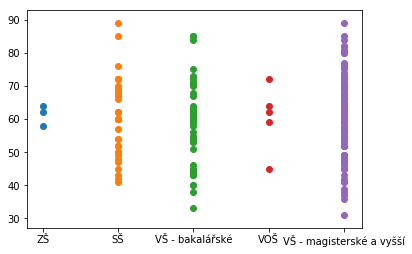

In [639]:
#OD 25
print("%s\n" % data[data[u'Věk:'] >= 25].groupby(u'Nejvyšší dosažené vzdělání:').size())
vzdelani = data[data[u'Věk:'] >= 25].groupby(u'Nejvyšší dosažené vzdělání:')

result = []
for g in vzdelani.groups:
    result.append(df1[u'součet'][vzdelani.groups[g]])

anova = stats.f_oneway(*result)
print("ANOVA\nStatistics: %f\npvalue: %f\n" % anova)
print("pvalue > 0.05 - přijímáme hypotézu - nemá vliv")

i = 0
for g in result:
    plt.scatter([i]*len(g), g)
    i += 1
    
plt.xticks(range(0, len(result)), data.groupby(u'Nejvyšší dosažené vzdělání:').groups.keys())
plt.show()

Pearson:
  PCC: -0.140322
  p-value: 0.019917

Spearman:
  Corr: -0.17901124249860426
  pvalue: 0.002891

Slope: -0.025571
  Intercept: 4.197420
  rvalue: -0.140322
  pvalue: 0.019917
  stderr: 0.010920



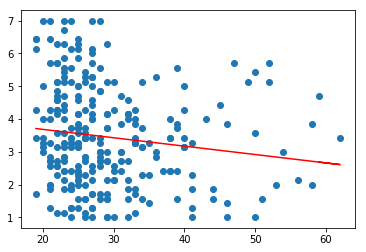

In [640]:
#Věk vs. FD
pearson_sperman_lin_plot(u'Věk:', u'FD')

Pearson:
  PCC: -0.002452
  p-value: 0.967717

Spearman:
  Corr: -0.04045948283182688
  pvalue: 0.504030

Slope: -0.000520
  Intercept: 3.300961
  rvalue: -0.002452
  pvalue: 0.967717
  stderr: 0.012840



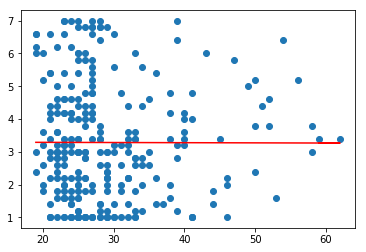

In [641]:
#Věk vs DA
pearson_sperman_lin_plot(u'Věk:', 'DA')

Mann-Whitney:
  Stat: 6561.000000
  pvalue: 0.001147
  z: -3.048382

t-test:
  Stat: -2.770901
  pvalue: 0.005974 



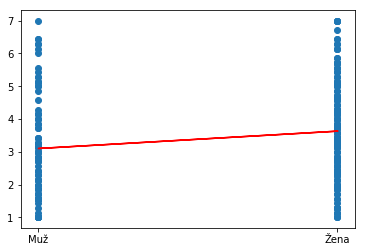

In [642]:
#Pohlaví vs FD

mw_ttest_lin_sex('FD')

Mann-Whitney:
  Stat: 8192.500000
  pvalue: 0.036743
  z: -1.782120

t-test:
  Stat: 1.717065
  pvalue: 0.087101 



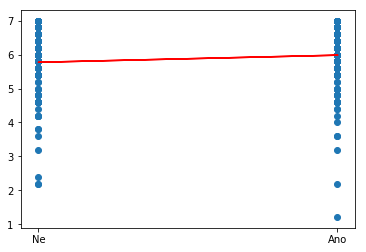

In [643]:
mw_ttest_lin_relig('NA')

Mann-Whitney:
  Stat: 3668.000000
  pvalue: 0.000000
  z: -8.676693

t-test:
  Stat: 9.927973
  pvalue: 0.000000 



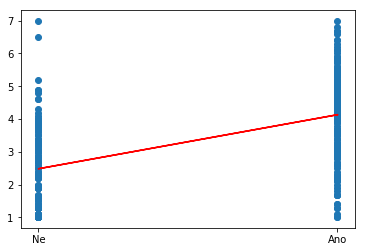

In [644]:
mw_ttest_lin_relig('AA')

Mann-Whitney:
  Stat: 8915.000000
  pvalue: 0.247834
  z: -0.681152

t-test:
  Stat: 0.506642
  pvalue: 0.612815 



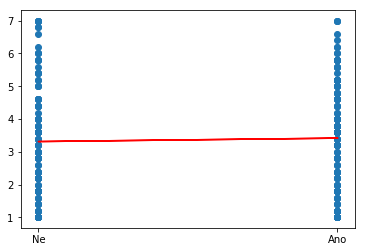

In [645]:
mw_ttest_lin_relig('EA')

Pearson:
  PCC: 0.043383
  p-value: 0.473692

Spearman:
  Corr: 0.07488386621123355
  pvalue: 0.215757

Slope: 0.038056
  Intercept: 11.877534
  rvalue: 0.043383
  pvalue: 0.473692
  stderr: 0.053042



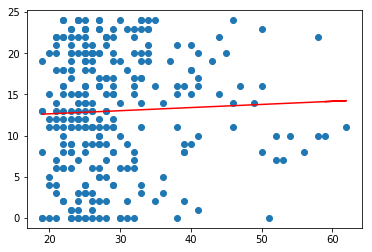

In [646]:
#Věk vs COS

pearson_sperman_lin_plot(u'Věk:', 'COS')

Pearson:
  PCC: 0.059596
  p-value: 0.324787

Spearman:
  Corr: 0.049941615603346506
  pvalue: 0.409411

Slope: 0.049014
  Intercept: 7.663980
  rvalue: 0.059596
  pvalue: 0.324787
  stderr: 0.049687



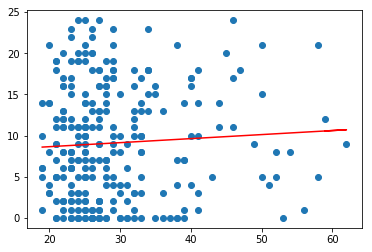

In [647]:
#Věk vs EPD

pearson_sperman_lin_plot(u'Věk:', 'EPD')

Pearson:
  PCC: 0.117625
  p-value: 0.051359

Spearman:
  Corr: 0.16867473194301688
  pvalue: 0.005039

Slope: 0.076552
  Intercept: 13.505917
  rvalue: 0.117625
  pvalue: 0.051359
  stderr: 0.039116



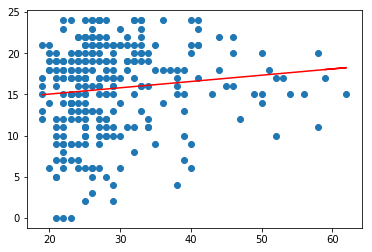

In [648]:
#Věk vs EWB

pearson_sperman_lin_plot(u'Věk:', 'EWB')

Pearson:
  PCC: 0.031214
  p-value: 0.606281

Spearman:
  Corr: 0.02798507940779088
  pvalue: 0.644041

Slope: 0.023658
  Intercept: 10.456714
  rvalue: 0.031214
  pvalue: 0.606281
  stderr: 0.045849



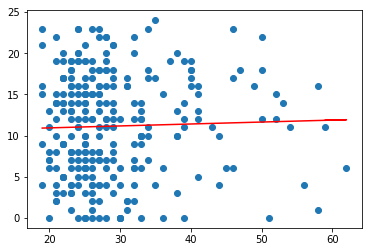

In [649]:
#Věk vs PAR

pearson_sperman_lin_plot(u'Věk:', 'PAR')

Pearson:
  PCC: -0.001476
  p-value: 0.980561

Spearman:
  Corr: 0.01921273347633576
  pvalue: 0.751103

Slope: -0.001259
  Intercept: 9.742110
  rvalue: -0.001476
  pvalue: 0.980561
  stderr: 0.051629



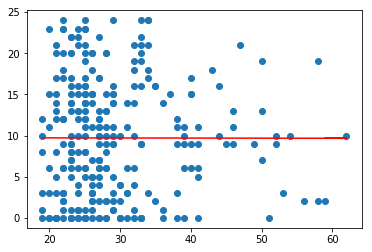

In [650]:
#Věk vs REL

pearson_sperman_lin_plot(u'Věk:', 'REL')

Mann-Whitney:
  Stat: 8206.500000
  pvalue: 0.340620
  z: -0.411099

t-test:
  Stat: -0.604551
  pvalue: 0.545979 



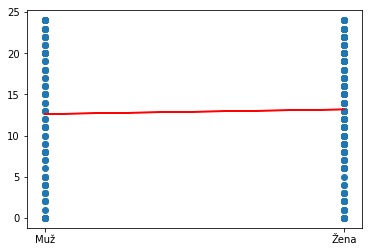

In [651]:
#Pohlaví vs COS

mw_ttest_lin_sex('COS')

Mann-Whitney:
  Stat: 7495.500000
  pvalue: 0.060261
  z: -1.550636

t-test:
  Stat: -1.276955
  pvalue: 0.202703 



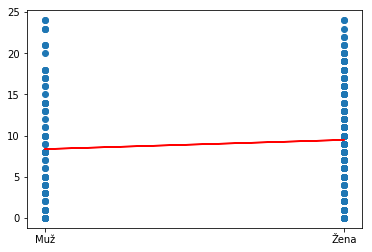

In [652]:
#Pohlaví vs EPD

mw_ttest_lin_sex('EPD')

Mann-Whitney:
  Stat: 7285.500000
  pvalue: 0.029379
  z: -1.887208

t-test:
  Stat: 1.789277
  pvalue: 0.074679 



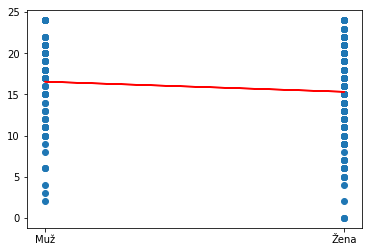

In [653]:
#Pohlaví vs EWB

mw_ttest_lin_sex('EWB')

Mann-Whitney:
  Stat: 6105.000000
  pvalue: 0.000078
  z: -3.779225

t-test:
  Stat: -3.735245
  pvalue: 0.000228 



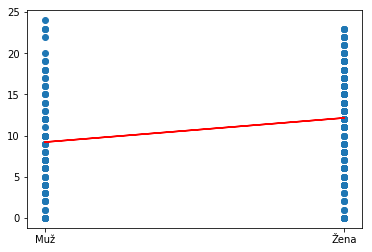

In [654]:
#Pohlaví vs PAR

mw_ttest_lin_sex('PAR')

Mann-Whitney:
  Stat: 7212.500000
  pvalue: 0.022367
  z: -2.004207

t-test:
  Stat: -1.796598
  pvalue: 0.073505 



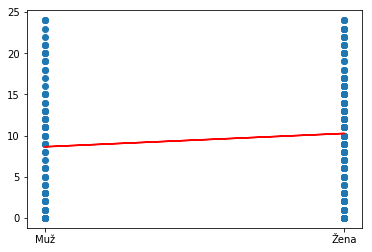

In [655]:
#Pohlaví vs REL

mw_ttest_lin_sex('REL')

Pearson:
  PCC: -0.168403
  p-value: 0.005111

Spearman:
  Corr: -0.18339311450075713
  pvalue: 0.002263

Slope: -1.426880
  Intercept: 63.796090
  rvalue: -0.168403
  pvalue: 0.005111
  stderr: 0.505487



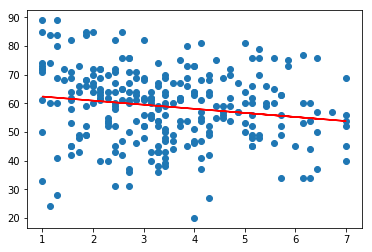

In [656]:
pearson_sperman_lin_plot('FD', u'součet')

Pearson:
  PCC: -0.073481
  p-value: 0.224505

Spearman:
  Corr: -0.08878064929399158
  pvalue: 0.141981

Slope: -0.534788
  Intercept: 60.626308
  rvalue: -0.073481
  pvalue: 0.224505
  stderr: 0.439289



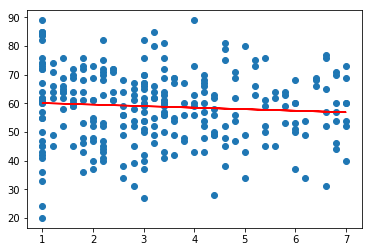

In [657]:
pearson_sperman_lin_plot('DA', u'součet')

Pearson:
  PCC: 0.120149
  p-value: 0.046527

Spearman:
  Corr: 0.10548390649464826
  pvalue: 0.080783

Slope: 1.524292
  Intercept: 49.891841
  rvalue: 0.120149
  pvalue: 0.046527
  stderr: 0.762271



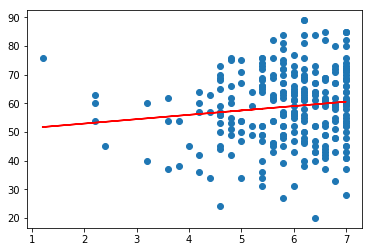

In [658]:
pearson_sperman_lin_plot('NA', u'součet')

Pearson:
  PCC: -0.005926
  p-value: 0.922075

Spearman:
  Corr: -0.0069821983362145955
  pvalue: 0.908239

Slope: -0.047724
  Intercept: 59.030885
  rvalue: -0.005926
  pvalue: 0.922075
  stderr: 0.487426



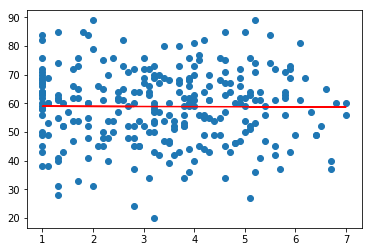

In [659]:
pearson_sperman_lin_plot('AA', u'součet')

Pearson:
  PCC: -0.302892
  p-value: 0.000000

Spearman:
  Corr: -0.3112852763394337
  pvalue: 0.000000

Slope: -2.299171
  Intercept: 66.621060
  rvalue: -0.302892
  pvalue: 0.000000
  stderr: 0.437831



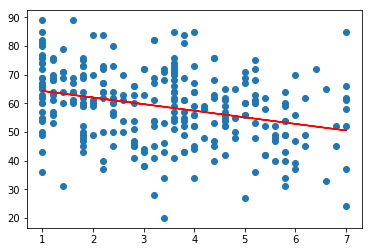

In [660]:
pearson_sperman_lin_plot('EA', u'součet')

Pearson:
  PCC: 0.148985
  p-value: 0.013391

Spearman:
  Corr: 0.15603212909035497
  pvalue: 0.009553

Slope: 0.262236
  Intercept: 55.463844
  rvalue: 0.148985
  pvalue: 0.013391
  stderr: 0.105340



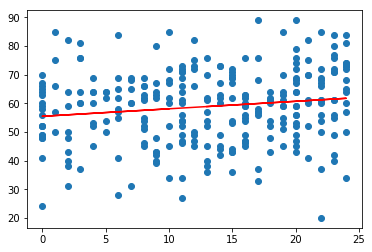

In [661]:
pearson_sperman_lin_plot('COS', u'součet')

Pearson:
  PCC: 0.081512
  p-value: 0.177718

Spearman:
  Corr: 0.0917593429774909
  pvalue: 0.129032

Slope: 0.153031
  Intercept: 57.477901
  rvalue: 0.081512
  pvalue: 0.177718
  stderr: 0.113247



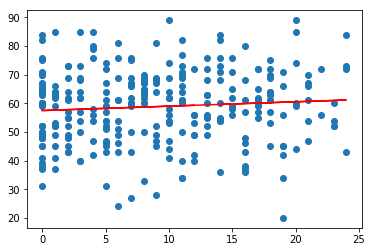

In [662]:
pearson_sperman_lin_plot('EPD', u'součet')

Pearson:
  PCC: 0.690523
  p-value: 0.000000

Spearman:
  Corr: 0.670366899923173
  pvalue: 0.000000

Slope: 1.638240
  Intercept: 33.092137
  rvalue: 0.690523
  pvalue: 0.000000
  stderr: 0.103859



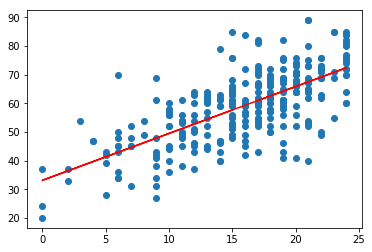

In [663]:
pearson_sperman_lin_plot('EWB', u'součet')

Pearson:
  PCC: 0.020069
  p-value: 0.740399

Spearman:
  Corr: 0.008377677044862909
  pvalue: 0.890005

Slope: 0.040884
  Intercept: 58.413418
  rvalue: 0.020069
  pvalue: 0.740399
  stderr: 0.123271



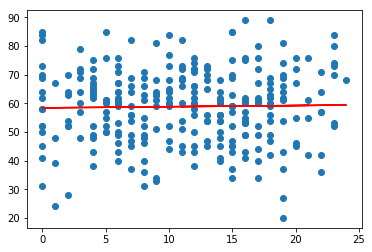

In [664]:
pearson_sperman_lin_plot('PAR', u'součet')

Pearson:
  PCC: 0.050277
  p-value: 0.406267

Spearman:
  Corr: 0.057107068663482835
  pvalue: 0.345440

Slope: 0.091003
  Intercept: 57.985867
  rvalue: 0.050277
  pvalue: 0.406267
  stderr: 0.109409



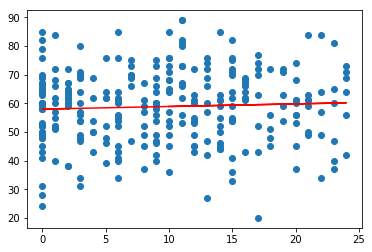

In [665]:
pearson_sperman_lin_plot('REL', u'součet')

Pearson:
  PCC: 0.248311
  p-value: 0.000031

Spearman:
  Corr: 0.23031347119273618
  pvalue: 0.000116

Slope: 0.134995
  Intercept: 50.950042
  rvalue: 0.248311
  pvalue: 0.000031
  stderr: 0.031873



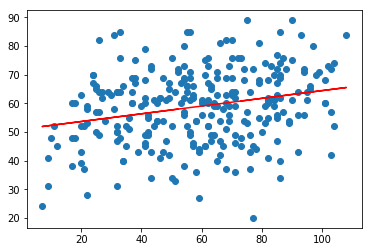

In [666]:
pearson_sperman_lin_plot('CELKEM', u'součet')

In [689]:
def construct_index(samples, sub_labels):
    levels = [samples, sub_labels]
    labels = [[], []]
    for i, v in enumerate(samples):
        for j, w in enumerate(sub_labels):
            labels[0].append(i)
            labels[1].append(j)
            
    return levels, labels

def generate_table_grouped(samples, sub_levels, group):
    results = {
        (u'N'): {},
        (u'M'): {},
        (u'SD'): {},
        (u'Min'): {},
        (u'Max'): {},
        (u'Med'): {},
        (u'k'): {},
              }
    index = [samples]

    for s in samples:
        for key, val in sub_levels.iteritems():
            results[(u'N')][(s, key)] = data.groupby(group)[s].count()[val]
            results[(u'M')][(s, key)] = data.groupby(group)[s].mean()[val]
            results[(u'SD')][(s, key)] = data.groupby(group)[s].std()[val]
            results[(u'Min')][(s, key)] = data.groupby(group)[s].min()[val]
            results[(u'Max')][(s, key)] = data.groupby(group)[s].max()[val]
            results[(u'Med')][(s, key)] = data.groupby(group)[s].median()[val]
            results[(u'k')][(s, key)] = data.groupby(group)[s].std()[val]/data.groupby(group)[s].mean()[val]
        
    pd.options.display.float_format = '{:.2f}'.format
    
    levels, labels = construct_index(samples, sub_levels.keys())
    return pd.DataFrame(results, columns=['N', 'M', 'Med', 'Min', 'Max', 'SD', 'k'], index=pd.MultiIndex(levels, labels))

In [693]:
def generate_table_all(samples):
    results = {
        (u'N'): {},
        (u'M'): {},        
        (u'SD'): {},
        (u'Med'): {},
        (u'Min'): {},
        (u'Max'): {},
        (u'k'): {}
              }

    for s in samples:
        results[(u'N')][s] = data[s].count()
        results[(u'M')][s] = data[s].mean()
        results[(u'SD')][s] = data[s].std()
        results[(u'Min')][s] = data[s].min()
        results[(u'Max')][s] = data[s].max()
        results[(u'Med')][s] = data[s].median()
        results[(u'k')][s] = data[s].std()/data[s].mean()
        
    pd.options.display.float_format = '{:.2f}'.format
    return pd.DataFrame(results, columns=['N', 'M', 'Med', 'Min', 'Max', 'SD', 'k'], index=samples)

In [694]:
generate_table_grouped([ 'FD', 'DA', 'NA', 'AA', 'EA'], {u'Muži': u'Muž', u'Ženy': u'Žena'}, u'Pohlaví:')

N    M  Med  Min  Max   SD    k
FD Muži   93 3.10 2.86 1.00 7.00 1.55 0.50
   Ženy  182 3.63 3.43 1.00 7.00 1.47 0.40
DA Muži   93 3.09 2.80 1.00 7.00 1.79 0.58
   Ženy  182 3.39 3.20 1.00 7.00 1.75 0.52
NA Muži   93 6.06 6.40 2.20 7.00 1.13 0.19
   Ženy  182 5.80 6.00 1.20 7.00 0.94 0.16
AA Muži   93 3.01 2.70 1.00 7.00 1.75 0.58
   Ženy  182 3.58 3.70 1.00 6.80 1.48 0.41
EA Muži   93 3.30 3.20 1.00 7.00 1.87 0.57
   Ženy  182 3.41 3.40 1.00 7.00 1.60 0.47

In [695]:
generate_table_grouped(['FD', 'DA', 'NA', 'AA', 'EA'], {u'Věřící': u'Ano', u'Nevěřící': u'Ne'}, u'vira')

N    M  Med  Min  Max   SD    k
FD Nevěřící  124 3.63 3.43 1.00 7.00 1.47 0.40
   Věřící    151 3.31 3.14 1.00 7.00 1.54 0.47
DA Nevěřící  124 3.55 3.20 1.00 7.00 1.73 0.49
   Věřící    151 3.07 2.80 1.00 7.00 1.77 0.58
NA Nevěřící  124 5.77 6.00 2.20 7.00 1.05 0.18
   Věřící    151 5.98 6.20 1.20 7.00 0.97 0.16
AA Nevěřící  124 2.49 2.35 1.00 7.00 1.31 0.53
   Věřící    151 4.13 4.30 1.00 7.00 1.42 0.34
EA Nevěřící  124 3.31 3.10 1.00 7.00 1.74 0.53
   Věřící    151 3.42 3.60 1.00 7.00 1.65 0.48

In [696]:
generate_table_grouped(['CELKEM', 'COS', 'EPD', 'EWB', 'PAR', 'REL'], {u'Muži': u'Muž', u'Ženy': u'Žena'}, u'Pohlaví:')

N     M  Med  Min  Max    SD    k
CELKEM Muži   93 55.35   55   12  103 25.16 0.45
       Ženy  182 60.35   62    7  108 22.69 0.38
COS    Muži   93 12.61   13    0   24  8.01 0.63
       Ženy  182 13.18   14    0   24  6.92 0.53
EPD    Muži   93  8.35    7    0   24  7.24 0.87
       Ženy  182  9.47    9    0   24  6.62 0.70
EWB    Muži   93 16.55   18    2   24  5.27 0.32
       Ženy  182 15.32   16    0   24  5.45 0.36
PAR    Muži   93  9.20    8    0   24  6.25 0.68
       Ženy  182 12.14   13    0   23  6.11 0.50
REL    Muži   93  8.63    8    0   24  7.60 0.88
       Ženy  182 10.25   10    0   24  6.78 0.66

In [697]:
generate_table_grouped(['CELKEM', 'COS', 'EPD', 'EWB', 'PAR', 'REL'], {u'Věřící': u'Ano', u'Nevěřící': u'Ne'}, u'vira')

N     M   Med  Min  Max    SD    k
CELKEM Nevěřící  124 43.15 41.00    7  104 19.60 0.45
       Věřící    151 71.40 71.00   17  108 18.51 0.26
COS    Nevěřící  124  8.47  8.00    0   24  6.35 0.75
       Věřící    151 16.70 18.00    0   24  5.78 0.35
EPD    Nevěřící  124  6.35  5.00    0   24  6.12 0.96
       Věřící    151 11.34 11.00    0   24  6.60 0.58
EWB    Nevěřící  124 15.70 17.00    0   24  5.41 0.34
       Věřící    151 15.76 16.00    0   24  5.43 0.34
PAR    Nevěřící  124  8.45  7.50    0   23  6.20 0.73
       Věřící    151 13.36 14.00    0   24  5.49 0.41
REL    Nevěřící  124  4.18  3.00    0   17  4.32 1.04
       Věřící    151 14.25 14.00    0   24  5.53 0.39

In [698]:
generate_table_grouped([u'součet'], {u'Muži': u'Muž', u'Ženy': u'Žena'}, u'Pohlaví:')

N     M  Med  Min  Max    SD    k
součet Muži   93 61.67   62   37   89 11.17 0.18
       Ženy  182 57.44   59   20   89 13.42 0.23

In [699]:
generate_table_grouped([u'součet'], {u'Věřící': u'Ano', u'Nevěřící': u'Ne'}, u'vira')

N     M  Med  Min  Max    SD    k
součet Nevěřící  124 57.47   59   24   89 12.42 0.22
       Věřící    151 60.02   61   20   89 13.11 0.22

In [700]:
generate_table_all([ 'FD', 'DA', 'NA', 'AA', 'EA'])

,N,M,Med,Min,Max,SD,k
FD,275,3.45,3.29,1.00,7.00,1.52,0.44
DA,275,3.29,3.00,1.00,7.00,1.76,0.54
NA,275,5.89,6.00,1.20,7.00,1.01,0.17
AA,275,3.39,3.40,1.00,7.00,1.59,0.47
EA,275,3.37,3.40,1.00,7.00,1.69,0.50


In [701]:
generate_table_all(['CELKEM', 'COS', 'EPD', 'EWB', 'PAR', 'REL'])

,N,M,Med,Min,Max,SD,k
CELKEM,275,58.66,60.00,7,108,23.62,0.40
COS,275,12.99,13.00,0,24,7.30,0.56
EPD,275,9.09,8.00,0,24,6.84,0.75
EWB,275,15.73,17.00,0,24,5.41,0.34
PAR,275,11.15,12.00,0,24,6.30,0.57
REL,275,9.71,9.00,0,24,7.10,0.73


In [702]:
generate_table_all([u'součet'])

,N,M,Med,Min,Max,SD,k
součet,275,58.87,60.00,20,89,12.84,0.22
